In [1]:
#Importando librerias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Cargando datos en frame
newDataSet = pd.read_csv('./covid-data/200511COVID19MEXICO.csv')
globaldir= './csv/'

In [7]:
#PRIMERA PARTE
#Variables tabla1 : Sonora 26, Positivo 1,  
entidad = 26;
resultadoCovid = 1
nameFileSonoraConf = globaldir+'tabla1.csv'
#Filtrado de datos
confirmadosSonora =  pd.DataFrame(newDataSet[(newDataSet['ENTIDAD_RES'] == entidad) & (newDataSet['RESULTADO'] == resultadoCovid)])
#Creacion de nuevo campo Defuncion
confirmadosSonora['DEFUNCION'] = np.where(confirmadosSonora['FECHA_DEF']=='9999-99-99', 0, 1) 
#seleccionando columnas [ENTIDAD_RES,FECHA_SINTOMAS,DEFUNCION]
sonoraConfirmados = pd.DataFrame(confirmadosSonora[['FECHA_SINTOMAS','RESULTADO','DEFUNCION']])
#Agrupor por fecha Sintoma
sonoraAgrupados = sonoraConfirmados.groupby('FECHA_SINTOMAS').sum('DEFUNCION','RESULTADO').reset_index()
#Ordenar por fecha de sintomas
ordenCasosMexico = sonoraAgrupados.sort_values('FECHA_SINTOMAS')
#Cambio de nombre columnas
hospSonChNLPuAgrupados.columns = ['Fecha Sintomas','Casos','Defunciones']

ordenCasosMexico
#Grabar tabla1.csv
#Quitar comentario para generar archivo -----------------
#ordenCasosMexico.to_csv(nameFileSonoraConf,index=False)
#--------------------------------------------------------

,FECHA_SINTOMAS,RESULTADO,DEFUNCION
0,2020-03-11,2,0
1,2020-03-12,2,0
2,2020-03-13,1,0
3,2020-03-16,2,0
4,2020-03-17,4,0
5,2020-03-18,1,0
6,2020-03-19,2,0
7,2020-03-20,2,1
8,2020-03-22,2,1
9,2020-03-23,2,0


In [61]:
#VARIABLES 
nameFileSonChPbNlConf = globaldir+'tabla2.csv'
entidadesHosp = [26,19,8,21]
tipoPaciente = 2
#----SEGUNDA PARTE FECHA_INGRESO----
#Filtro por entidades Sonora, Puebla, Nuevo leon, Chihuahua
hospSonChNLPu = pd.DataFrame(newDataSet[ (
    (newDataSet['ENTIDAD_RES'] == entidadesHosp[0]) |
    (newDataSet['ENTIDAD_RES'] == entidadesHosp[1]) |
    (newDataSet['ENTIDAD_RES'] == entidadesHosp[2]) |
    (newDataSet['ENTIDAD_RES'] == entidadesHosp[3]) ) & 
    (
    (newDataSet['FECHA_INGRESO'] != '9999-99-99') & (newDataSet['FECHA_INGRESO'] != '') 
    ) &
    (newDataSet['TIPO_PACIENTE'] == tipoPaciente)
    ])
#Obtener solo columnas entidades y tipo
hospEntidades = pd.DataFrame(hospSonChNLPu[['ENTIDAD_RES','TIPO_PACIENTE']])
#Agrupar y contar registros por entidad
hospSonChNLPuAgrupados = hospEntidades.groupby('ENTIDAD_RES')['TIPO_PACIENTE'].count().reset_index()
#Cambio de nombre de entidades 
hospSonChNLPuAgrupados["ENTIDAD_RES"].replace({26: "Sonora", 21: "Puebla",19:"Nuevo Leon", 8:"Chihuahua"}, inplace=True)
#Cambio de nombre de columnas
hospSonChNLPuAgrupados.columns = ['Estados','Hospitalizados']
hospSonChNLPuAgrupados
#Grabar tabla2.csv
#Quitar comentario para generar archivo -----------------
#hospSonChNLPuAgrupados.to_csv(nameFileSonChPbNlConf,index=False)
#--------------------------------------------------------

,Estados,Hospitalizados
0,Chihuahua,1013
1,Nuevo Leon,1065
2,Puebla,1295
3,Sonora,604


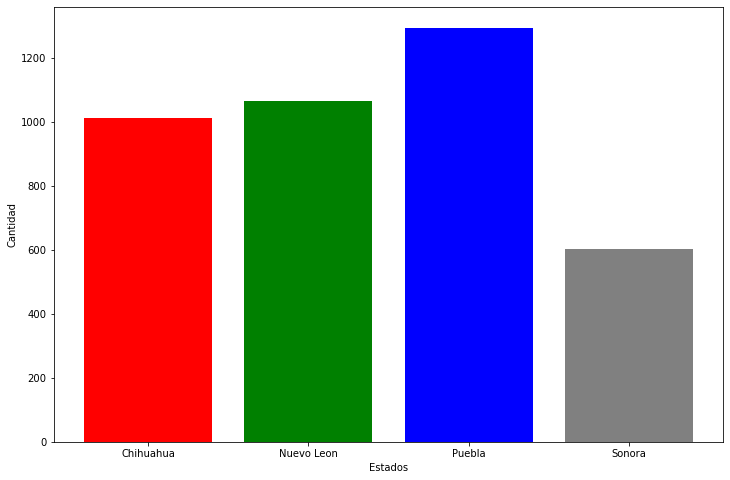

In [133]:
#Grafica de barras por estado
Estados = hospSonChNLPuAgrupados['Estados']
Hospitalizados = hospSonChNLPuAgrupados['Hospitalizados']
colorEst=['red', 'green', 'blue', 'gray']
# Tamaño
fig, ax = plt.subplots(figsize =(12, 8))
# Barra horizontal
ax.bar(Estados, Hospitalizados, color=colorEst)
plt.xlabel('Estados')
plt.ylabel('Cantidad')
plt.title = 'Hopitalizados en CH,SON,PUB,NL'
plt.savefig('grafica1.png')



 

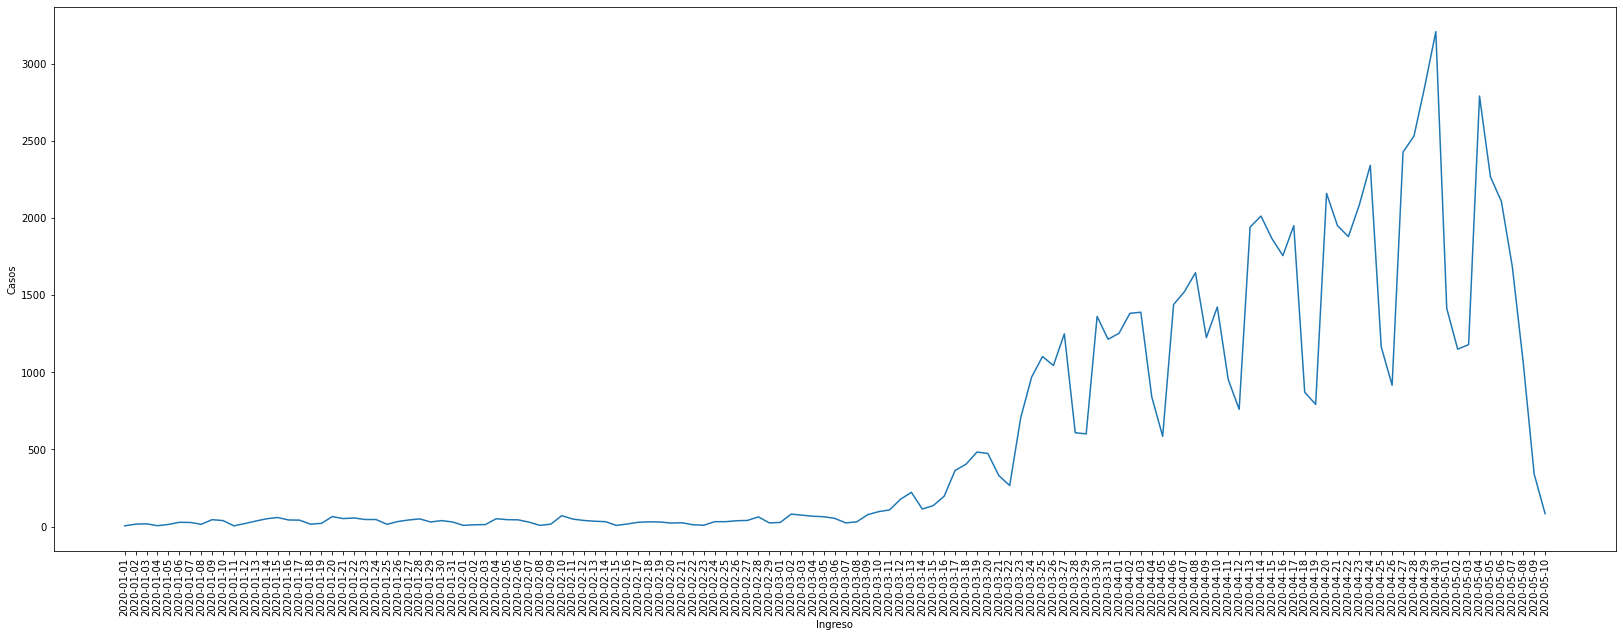

In [58]:
resultadoCov= 2
#Filtro fecha de ingraso 
casosConfirmados = pd.DataFrame(newDataSet[(newDataSet['RESULTADO'] == resultadoCov)])
casosConfirmados
casosConfirmadosFechaResult = pd.DataFrame(casosConfirmados[['FECHA_INGRESO','RESULTADO']])


agruparFechasConfirm = casosConfirmadosFechaResult.groupby('FECHA_INGRESO')['RESULTADO'].count().reset_index()
Ingreso = agruparFechasConfirm['FECHA_INGRESO']
Casos = agruparFechasConfirm['RESULTADO']

fig, ax = plt.subplots(figsize =(28, 10))
# Barra horizontal
ax.plot(Ingreso, Casos)
plt.xticks(rotation=90)
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.savefig('grafica2.png')

